In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Read images and Resize image to 224x224

In [5]:
def read_data(path):
    
    train_path = path+"/train"
    test_path = path+"/test"
    validation_path = path+"/val"
    # Define the new image size
    new_size = (224, 224)
    tr_data, test_data, val_data = [], [], []
    tr_out, test_out, val_out = [], [], []

    for i in os.listdir(train_path):

        if i != ".DS_Store":
            for j in os.listdir(train_path+"/"+i):
                tr_out.append(i)
                img = cv2.imread(train_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                tr_data.append(resized_img)
            for j in os.listdir(test_path+"/"+i):
                test_out.append(i)
                img = cv2.imread(test_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                test_data.append(resized_img)
            for j in os.listdir(validation_path+"/"+i):
                val_out.append(i)
                img = cv2.imread(validation_path+"/"+i+"/"+j)
                # Resize the image
                resized_img = cv2.resize(img, new_size)
                val_data.append(resized_img)
                
    tr_data, test_data, val_data = np.array(tr_data), np.array(test_data), np.array(val_data)
    tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

    return tr_data, test_data, val_data, tr_out, test_out, val_out


In [6]:
path = "/content/drive/MyDrive/DLA5/Group_1"
train_data, test_data, val_data, train_out, test_out, val_out = read_data(path)

ValueError: ignored

In [ ]:
# Normalize the pixel values to [0, 1]
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

In [ ]:
def convert(data):
  out = []
  for i in data:
    if i == 'brain':
      out.append(0)
    if i == 'ewer':
      out.append(1)
    if i == 'helicopter':
      out.append(2)
    if i == 'scorpion':
      out.append(3)
    if i == 4:
      out.append(4)

  return np.array(out)

In [ ]:
train_label = convert(train_out)
val_label = convert(val_out)
test_label = convert(test_out)

In [ ]:
# Input layer
inputs = Input(shape=(224, 224, 3))

# First convolutional layer
conv1 = Conv2D(8, (11, 11), strides=4, padding='valid', activation='relu')(inputs)
pool1 = MaxPooling2D((3, 3), strides=2)(conv1)

# Second convolutional layer
conv2 = Conv2D(16, (5, 5), strides=1, padding='valid', activation='relu')(pool1)
pool2 = MaxPooling2D((3, 3), strides=2)(conv2)

# Flatten the output from the convolutional layers
flatten = Flatten()(pool2)

# Fully connected layers
fc1 = Dense(128, activation='relu')(flatten)
output = Dense(5, activation='softmax')(fc1)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Save the model weights
model.save_weights("C:/Users/shilp/OneDrive/Documents/CS671/architecture_1_weights.h5")


In [ ]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)

Epoch 1/10000
8/8 [==============================] - 2s 107ms/step - loss: 1.6304 - accuracy: 0.2160 - val_loss: 1.5197 - val_accuracy: 0.4000
Epoch 2/10000
8/8 [==============================] - 1s 75ms/step - loss: 1.4496 - accuracy: 0.3840 - val_loss: 1.3735 - val_accuracy: 0.4600
Epoch 3/10000
8/8 [==============================] - 1s 75ms/step - loss: 1.2674 - accuracy: 0.4640 - val_loss: 1.1545 - val_accuracy: 0.5800
Epoch 4/10000
8/8 [==============================] - 1s 77ms/step - loss: 1.0664 - accuracy: 0.5840 - val_loss: 1.0406 - val_accuracy: 0.5800
Epoch 5/10000
8/8 [==============================] - 1s 77ms/step - loss: 0.9237 - accuracy: 0.6320 - val_loss: 0.9927 - val_accuracy: 0.6600
Epoch 6/10000
8/8 [==============================] - 1s 79ms/step - loss: 0.7734 - accuracy: 0.7320 - val_loss: 0.7989 - val_accuracy: 0.7400
Epoch 7/10000
8/8 [==============================] - 1s 77ms/step - loss: 0.6388 - accuracy: 0.7960 - val_loss: 0.8778 - val_accuracy: 0.6400
Epoch

In [ ]:
# Evaluate the model on the val set
val_loss, val_acc = model.evaluate(val_data, val_label)
print('Val accuracy:', val_acc)

2/2 [==============================] - 0s 16ms/step - loss: 0.7989 - accuracy: 0.7400
Val accuracy: 0.7400000095367432


In [ ]:
# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(train_data, train_label)
print('train accuracy:', train_acc)

8/8 [==============================] - 0s 16ms/step - loss: 0.6450 - accuracy: 0.8160
train accuracy: 0.8159999847412109


# Architecture 2

In [ ]:
# Set the layers of Architecture-1 to non-trainable
for layer in model.layers:
    layer.trainable = False

# Define the layers for Architecture-2
# Input layer
inputs_2 = Input(shape=(224, 224, 3))
conv21 = model.layers[1](inputs_2)
maxpool21 = model.layers[2](conv21)
conv22 = model.layers[3](maxpool21)
maxpool22 = model.layers[4](conv22)
conv23 = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(maxpool22)
maxpool23 = MaxPooling2D((3, 3), strides=2)(conv23)
flatten2 = Flatten()(maxpool23)
fc21 = Dense(128, activation='relu')(flatten2)
output_layer2 = Dense(5, activation='softmax')(fc21)

# Define the model with Architecture-2
model_2 = Model(inputs=inputs_2, outputs=output_layer2)

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model_2.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)
# Save the model weights
model_2.save_weights("C:/Users/shilp/OneDrive/Documents/CS671/architecture_2_weights.h5")


Epoch 1/10000
8/8 [==============================] - 1s 63ms/step - loss: 1.5467 - accuracy: 0.2960 - val_loss: 1.4510 - val_accuracy: 0.3400
Epoch 2/10000
8/8 [==============================] - 0s 27ms/step - loss: 1.3543 - accuracy: 0.4480 - val_loss: 1.2689 - val_accuracy: 0.5800
Epoch 3/10000
8/8 [==============================] - 0s 27ms/step - loss: 1.1514 - accuracy: 0.6160 - val_loss: 1.1122 - val_accuracy: 0.6000
Epoch 4/10000
8/8 [==============================] - 0s 29ms/step - loss: 1.0287 - accuracy: 0.6160 - val_loss: 1.0600 - val_accuracy: 0.5800
Epoch 5/10000
8/8 [==============================] - 0s 29ms/step - loss: 0.9452 - accuracy: 0.6600 - val_loss: 0.9225 - val_accuracy: 0.7400
Epoch 6/10000
8/8 [==============================] - 0s 29ms/step - loss: 0.8635 - accuracy: 0.6640 - val_loss: 0.8677 - val_accuracy: 0.7200
Epoch 7/10000
8/8 [==============================] - 0s 34ms/step - loss: 0.7815 - accuracy: 0.7280 - val_loss: 0.8243 - val_accuracy: 0.7200
Epoch 

In [ ]:
model_2.summary()

Model: "model_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_67 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 10, 10, 32)        464

In [ ]:
# Evaluate the model on the train set
train_loss, train_acc = model_2.evaluate(train_data, train_label)
print('Train accuracy:', train_acc)
# Evaluate the model on the val set
val_loss, val_acc = model_2.evaluate(val_data, val_label)
print('Val accuracy:', val_acc)

8/8 [==============================] - 0s 14ms/step - loss: 0.5248 - accuracy: 0.8200
Train accuracy: 0.8199999928474426
2/2 [==============================] - 0s 16ms/step - loss: 0.6742 - accuracy: 0.8000
Val accuracy: 0.800000011920929


4/4 [==============================] - 0s 21ms/step


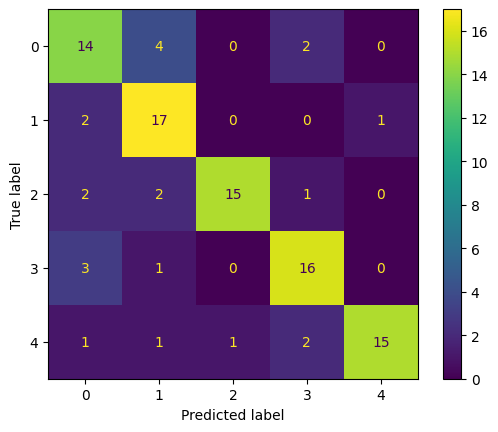

In [ ]:
predictions = model_2.predict(test_data, verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_label, p_class)
cm = confusion_matrix(test_label, p_class)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

# Architecture 3

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Set the layers of Architecture-1 to non-trainable
for layer in model.layers:
    layer.trainable = False

# Define the layers for Architecture-3
# Input layer
inputs_3 = Input(shape=(224, 224, 3))
conv31 = model.layers[1](inputs_3)
maxpool31 = model.layers[2](conv31)
conv32 = model.layers[3](maxpool31)
maxpool32 = model.layers[4](conv32)
conv33 = Conv2D(32, (3, 3), strides=1, activation='relu', padding='valid')(maxpool32)
conv34 = Conv2D(64, (3, 3), strides=1, activation='relu', padding='valid')(conv33)
maxpool34 = MaxPooling2D((3, 3), strides=2)(conv34)
flatten3 = Flatten()(maxpool34)
fc31 = Dense(128, activation='relu')(flatten3)
output_layer3 = Dense(5, activation='softmax')(fc31)

# Define the model with Architecture-3
model_3 = Model(inputs=inputs_3, outputs=output_layer3)

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

callback = EarlyStopping(monitor="val_loss",min_delta=0.0001, verbose = 0, restore_best_weights=True, patience = 2)
# Train the model
model_3.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=10000, batch_size=32,callbacks=callback,shuffle = True)
# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(test_data, test_label)
print('Test accuracy:', test_acc)
# Save the model weights
model_3.save_weights("C:/Users/shilp/OneDrive/Documents/CS671/architecture_3_weights.h5")

Epoch 1/10000
8/8 [==============================] - 2s 81ms/step - loss: 1.5628 - accuracy: 0.2120 - val_loss: 1.5087 - val_accuracy: 0.3200
Epoch 2/10000
8/8 [==============================] - 0s 41ms/step - loss: 1.4224 - accuracy: 0.3600 - val_loss: 1.3524 - val_accuracy: 0.4400
Epoch 3/10000
8/8 [==============================] - 0s 29ms/step - loss: 1.2660 - accuracy: 0.4920 - val_loss: 1.2570 - val_accuracy: 0.5600
Epoch 4/10000
8/8 [==============================] - 0s 29ms/step - loss: 1.1727 - accuracy: 0.5640 - val_loss: 1.2257 - val_accuracy: 0.5800
Epoch 5/10000
8/8 [==============================] - 0s 31ms/step - loss: 1.1044 - accuracy: 0.5600 - val_loss: 1.1979 - val_accuracy: 0.4800
Epoch 6/10000
8/8 [==============================] - 0s 34ms/step - loss: 1.0308 - accuracy: 0.6160 - val_loss: 1.1256 - val_accuracy: 0.5800
Epoch 7/10000
8/8 [==============================] - 0s 32ms/step - loss: 0.9513 - accuracy: 0.6760 - val_loss: 1.1023 - val_accuracy: 0.6000
Epoch 

In [ ]:
# Evaluate the model on the train set
train_loss, train_acc = model_3.evaluate(train_data, train_label)
print('Train accuracy:', train_acc)
# Evaluate the model on the val set
val_loss, val_acc = model_3.evaluate(val_data, val_label)
print('Val accuracy:', val_acc)

8/8 [==============================] - 0s 18ms/step - loss: 0.8280 - accuracy: 0.7000
Train accuracy: 0.699999988079071
2/2 [==============================] - 0s 16ms/step - loss: 1.0237 - accuracy: 0.5600
Val accuracy: 0.5600000023841858


In [ ]:
for layer in model_3.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

conv2d_67 (11, 11, 3, 8)
conv2d_68 (5, 5, 8, 16)
conv2d_72 (3, 3, 16, 32)
conv2d_73 (3, 3, 32, 64)


In [ ]:
model_3.summary()

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_51 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_67 (Conv2D)          (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 26, 26, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 10, 10, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 8, 8, 32)          464

In [ ]:
# # Select a random image from the training set
# x = train_data[0]

# # Create a new model that outputs the feature maps from the first and third convolutional layers
# model_3_layers = Model(inputs=model_3.input, outputs=[model_3.layers[1].output])



In [ ]:
# Create a new model that outputs the feature maps from the first and third convolutional layers
model_new = Model(inputs=inputs_3, outputs=[conv31, conv32, conv33, conv34])

In [ ]:
# Select a random image from the training set
x = train_data[0]

# Predict the feature maps for the selected image
feature_maps = model_new.predict(x.reshape(1, 224, 224, 3))

1/1 [==============================] - 0s 94ms/step


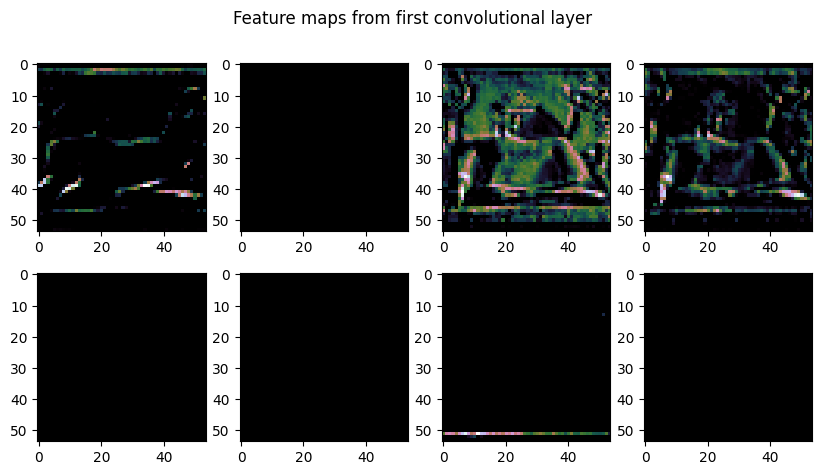

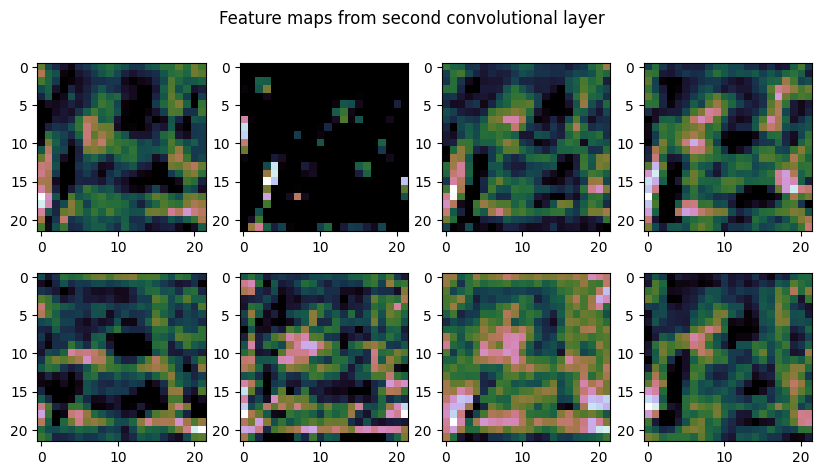

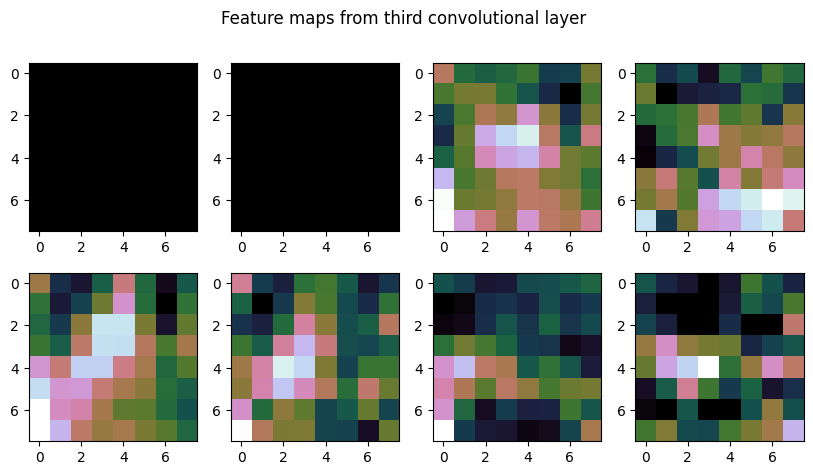

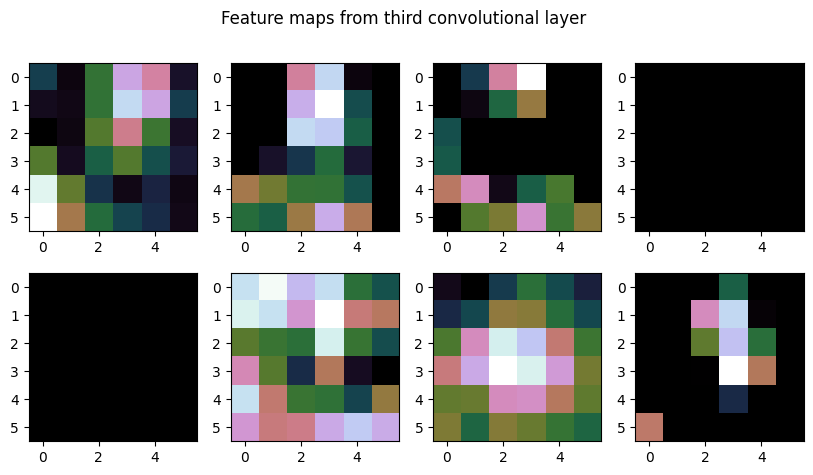

In [ ]:

# Plot the feature maps from the first convolutional layer
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(feature_maps[0][0, :, :, i], cmap='cubehelix')
plt.suptitle('Feature maps from first convolutional layer')
plt.show()

# Plot the feature maps from the second convolutional layer
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(feature_maps[1][0, :, :, i], cmap='cubehelix')
plt.suptitle('Feature maps from second convolutional layer')
plt.show()
# Plot the feature maps from the third convolutional layer
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(feature_maps[2][0, :, :, i], cmap='cubehelix')
plt.suptitle('Feature maps from third convolutional layer')
plt.show()
# Plot the feature maps from the third convolutional layer
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(feature_maps[3][0, :, :, i], cmap='cubehelix')
plt.suptitle('Feature maps from third convolutional layer')
plt.show()
